# Log-Linear Models and Graphical Models

For any three categorical variables `A`, `B` and `C`, with corresponding `I`, `J` and `K` levels, there are 9 log-linear model `LLM` specifications possible. These 9 LLM specifications can be grouped into the 5 broad categories of 

- independence, 
- joint independence, 
- conditional independence, 
- homogenous association or 
- saturated. 

Specifically, the functional specifications are written as follows.

- independence: A, B and C are all independent, denoted as `(A, B, C)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C$
- joint independence: AB are jointly independent of C `(AB, C)`; AC are jointly independent of B `(AC, B)`; BC are jointly independent of A `(BC, A)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{AB}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{AC}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{jk}^{BC}$
- conditional independence: A and B are independent given C `(AC, BC)`; A and C are independent given B `(AB, BC)`; B and C are independent give A `(AB, AC)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ik}^{AC} + \lambda_{jk}^{BC}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{jk}^{BC}$
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC}$
- homogeneous association: there is no three way interaction `(AB, AC, BC)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC} + \lambda_{jk}^{BC}$
- saturated: there are main, pairwise and three-way effects `(ABC)`
  - $\log{\mu_{ijk}} = \lambda + \lambda_i^A + \lambda_j^B + \lambda_k^C + \lambda_{ij}^{AB} + \lambda_{ik}^{AC} + \lambda_{jk}^{BC} + \lambda_{ijk}^{ABC}$

Each of these models have a corresponding graphical representation as follows.

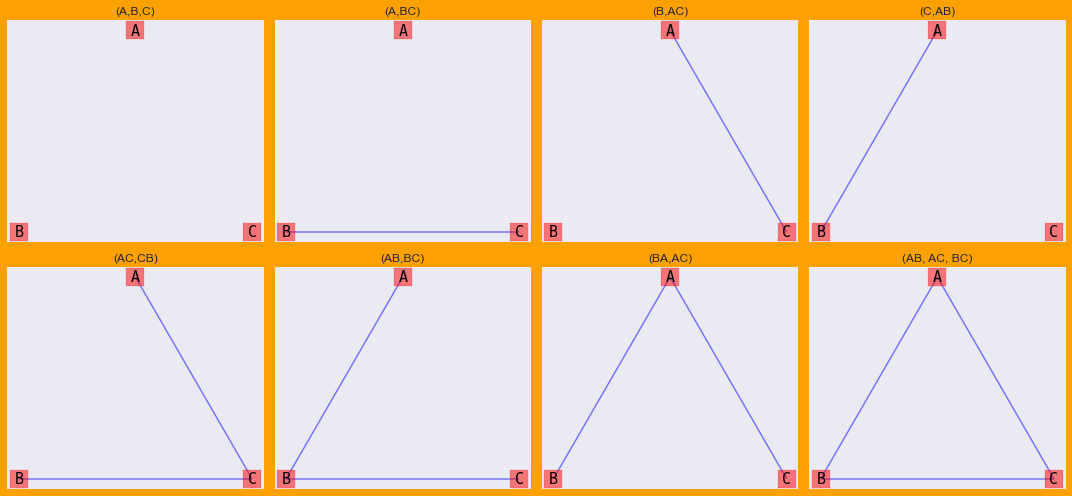

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

def get_graph(nodes=['A', 'B', 'C'], edges=[]):
    g = nx.Graph()
    
    for n in nodes:
        g.add_node(n)
    for u, v in edges:
        g.add_edge(u, v)
        
    return g

def draw_graph(k, g, ax):
    pos = {
        'A': (200, 250),
        'B': (150, 230),
        'C': (250, 230)
    }
    
    params = {
        'node_color': 'r',
        'node_size': 350,
        'node_shape': 's',
        'alpha': 0.5,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)
    
    params = {
        'font_size': 15,
        'font_color': 'k',
        'font_family': 'monospace',
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)
    
    params = {
        'width': 1.5,
        'alpha': 0.5,
        'edge_color': 'b',
        'arrowsize': 20,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)
    
    ax.set_title(k)
    ax.grid(False)

graphs = {
    '(A,B,C)': [],
    '(A,BC)': [('B', 'C')],
    '(B,AC)': [('A', 'C')],
    '(C,AB)': [('A', 'B')],
    '(AC,CB)': [('A', 'C'), ('C', 'B')],
    '(AB,BC)': [('A', 'B'), ('B', 'C')],
    '(BA,AC)': [('B', 'A'), ('A', 'C')],
    '(AB, AC, BC)': [('A', 'B'), ('B', 'C'), ('A', 'C')]
}

graphs = {k: get_graph(edges=edges) for k, edges in graphs.items()}

fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = np.ravel(axes)

for (k, g), ax in zip(graphs.items(), axes):
    draw_graph(k, g, ax)
    
fig.patch.set_facecolor('#fca100')
plt.tight_layout()

Notice `(ABC)` was not drawn with the previous graphs/models. That's because `(ABC)` is a bit special in its own way in that there is a 3-way interaction between `A`, `B`, `C`. We can draw `(ABC)` as a factor graph. 

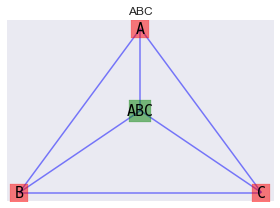

In [2]:
def draw_abc(ax):
    g = nx.Graph()
    
    for n in ['A', 'B', 'C', 'ABC']:
        g.add_node(n)
        
    for u, v in [('A', 'B'), ('B', 'C'), ('A', 'C'), ('A', 'ABC'), ('B', 'ABC'), ('C', 'ABC')]:
        g.add_edge(u, v)
        
    pos = {
        'A': (200, 250),
        'B': (150, 230),
        'C': (250, 230),
        'ABC': (200, 240)
    }
    
    params = {
        'nodelist': ['A', 'B', 'C'],
        'node_color': 'r',
        'node_size': 350,
        'node_shape': 's',
        'alpha': 0.5,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)
    
    params = {
        'nodelist': ['ABC'],
        'node_color': 'g',
        'node_size': 450,
        'node_shape': 's',
        'alpha': 0.5,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)
    
    params = {
        'font_size': 15,
        'font_color': 'k',
        'font_family': 'monospace',
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)
    
    params = {
        'width': 1.5,
        'alpha': 0.5,
        'edge_color': 'b',
        'arrowsize': 20,
        'pos': pos,
        'ax': ax
    }
    _ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)
    
    ax.set_title('ABC')
    ax.grid(False)
    
fig, ax = plt.subplots(figsize=(4, 3))
draw_abc(ax)
plt.tight_layout()

## Bayesian Network, Data

Let's create a Bayesian Belief Network `BBN` with three nodes `A`, `B` and `C` and the serial structure `A` -> `B` -> `C`.

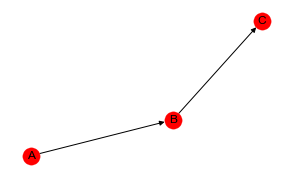

In [3]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.generator.bbngenerator import convert_for_drawing

a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5, 0.4, 0.6])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.7, 0.3, 0.2, 0.8])

bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c) \
    .add_edge(Edge(a, b, EdgeType.DIRECTED)) \
    .add_edge(Edge(b, c, EdgeType.DIRECTED))

g = convert_for_drawing(bbn)

fig, ax = plt.subplots(figsize=(5, 3))

nx.draw(**{
    'G': g,
    'ax': ax,
    'pos': nx.spiral_layout(g),
    'with_labels': True,
    'labels': {0: 'A', 1: 'B', 2: 'C'},
    'node_color': 'r'
})

A contigency table may be created from the sampled data of the `BBN`. 

In [4]:
import pandas as pd
from pybbn.sampling.sampling import LogicSampler

sampler = LogicSampler(bbn)
df = pd.DataFrame(sampler.get_samples(n_samples=1_000, seed=37)) \
    .rename(columns={0: 'a', 1: 'b', 2: 'c'}) \
    .assign(n=1) \
    .groupby(['a', 'b', 'c']) \
    .agg('sum') \
    .reset_index()

In [5]:
df

,a,b,c,n
0,off,off,off,238
1,off,off,on,54
2,off,on,off,53
3,off,on,on,127
4,on,off,off,202
5,on,off,on,61
6,on,on,off,82
7,on,on,on,183


## Likelihood and deviance

Now, let's specify the `LLMs` and see which one best explains the data. As you can see, the homogenous model `(AB, AC, BC)` and the conditional independence model `(AB, BC)` are comptetitive with one another (they have the lowest deviance and the highest log-likelihood).

In [6]:
from patsy import dmatrices
import statsmodels.api as sm

def get_stats(formula, df):
    y, X = dmatrices(formula, df, return_type='dataframe')
    r = sm.GLM(y, X, family=sm.families.Poisson()).fit()
    
    return {
        'df_model': r.df_model,
        'deviance': r.deviance,
        'log_likelihood': r.llf
    }

formulas = {
    '(A,B,C)': 'n ~ a + b + c',
    '(A,BC)': 'n ~ a + b*c',
    '(B,AC)': 'n ~ b + a*c',
    '(C,AB)': 'n ~ c + a*b',
    '(AC,CB)': 'n ~ a*c + c*b',
    '(AB,BC)': 'n ~ a*b + b*c',
    '(BA,AC)': 'n ~ b*a + a*c',
    '(AB, AC, BC)': 'n ~ (a + b + c)**2'
}

pd.DataFrame([{**{'model': m}, **get_stats(f, df)} for m, f in formulas.items()])

,model,df_model,deviance,log_likelihood
0,"(A,B,C)",3,267.851450,-159.940146
1,"(A,BC)",4,16.687786,-34.358314
2,"(B,AC)",4,261.530543,-156.779692
3,"(C,AB)",4,253.136932,-152.582887
4,"(AC,CB)",5,10.366879,-31.197860
5,"(AB,BC)",5,1.973268,-27.001055
6,"(BA,AC)",5,246.816025,-149.422433
7,"(AB, AC, BC)",6,1.445598,-26.737220


## Detecting model differences

We might want to try to some hypothesis testing to see if there is any real differences between these LLMs.  Let's sample 10 different data sets and apply each model over these data sets. We will then compute the averages and apply a 1-way ANOVA test to see if there are any differences in terms of deviance and log-likelhood.

In [7]:
result_df = []

for _ in range(10):
    df = pd.DataFrame(sampler.get_samples(n_samples=1_000, seed=37)) \
        .rename(columns={0: 'a', 1: 'b', 2: 'c'}) \
        .assign(n=1) \
        .groupby(['a', 'b', 'c']) \
        .agg('sum') \
        .reset_index()
    
    r = pd.DataFrame([{**{'model': m}, **get_stats(f, df)} for m, f in formulas.items()])
    result_df.append(r)
    
result_df = pd.concat(result_df)

In [8]:
result_df \
    .groupby(['model']) \
    .agg('mean') \
    .sort_values(['log_likelihood', 'deviance'], ascending=[False, False])

,df_model,deviance,log_likelihood
model,,,
"(AB, AC, BC)",6,1.445598,-26.737220
"(AB,BC)",5,1.973268,-27.001055
"(AC,CB)",5,10.366879,-31.197860
"(A,BC)",4,16.687786,-34.358314
"(BA,AC)",5,246.816025,-149.422433
"(C,AB)",4,253.136932,-152.582887
"(B,AC)",4,261.530543,-156.779692
"(A,B,C)",3,267.851450,-159.940146


### Deviance

As you can see, there is statistically significant difference between the deviances using a 1-way ANOVA test.

In [9]:
from statsmodels.formula.api import ols

model = ols('deviance ~ model', result_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               deviance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.034e+31
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:52:19   Log-Likelihood:                 2290.5
No. Observations:                  80   AIC:                            -4565.
Df Residuals:                      72   BIC:                            -4546.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               267.8515   2.96e-14   9.03e+15      0.000     267.851     267.851
model[T.(A,BC)]        -251.1637   4.19e-14  -5.99e+15      0.000    -251.164    -251.164
model[T.(AB, AC, BC)]  -266.4059   4.19e-14  -6.35e+15      0.000    -266.406    -266.406
model[T.(AB,BC)]       -265.8782   4.19e-14  -6.34e+15      0.000    -265.878    -265.878
model[T.(AC,CB)]       -257.4846   4.19e-14  -6.14e+15      0.000    -257.485    -257.485
model[T.(B,AC)]          -6.3209   4.19e-14  -1.51e+14      0.000      -6.321      -6.321
model[T.(BA,AC)]        -21.0354   4.19e-14  -5.02e+14      0.000     -21.035     -21.035
model[T.(C,AB)]         -14.7145   4.19e-14  -3.51e+14      0.000     -14.715     -14.715
==============================================================================
Omnibus:                       16.820   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.494
Skew:                          -0.676   Prob(JB):                      0.00868
Kurtosis:                       1.991   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using Tukey's Honestly Significant Difference `HSD` test, we can inspect which pairs of models are different. We find that all pairs of models are different with satistical significance.

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=result_df['deviance'], groups=result_df['model'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
"(A,B,C)","(A,BC)",-251.1637,0.001,-251.1637,-251.1637,True
"(A,B,C)","(AB, AC, BC)",-266.4059,0.001,-266.4059,-266.4059,True
"(A,B,C)","(AB,BC)",-265.8782,0.001,-265.8782,-265.8782,True
"(A,B,C)","(AC,CB)",-257.4846,0.001,-257.4846,-257.4846,True
"(A,B,C)","(B,AC)",-6.3209,0.001,-6.3209,-6.3209,True
"(A,B,C)","(BA,AC)",-21.0354,0.001,-21.0354,-21.0354,True
"(A,B,C)","(C,AB)",-14.7145,0.001,-14.7145,-14.7145,True
"(A,BC)","(AB, AC, BC)",-15.2422,0.001,-15.2422,-15.2422,True
"(A,BC)","(AB,BC)",-14.7145,0.001,-14.7145,-14.7145,True
"(A,BC)","(AC,CB)",-6.3209,0.001,-6.3209,-6.3209,True


### Log-likelihood

Now, we will do the same to see if there's a difference with the log-likelihood.

In [11]:
model = ols('log_likelihood ~ model', result_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_likelihood   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.163e+31
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:52:19   Log-Likelihood:                 2323.6
No. Observations:                  80   AIC:                            -4631.
Df Residuals:                      72   BIC:                            -4612.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -159.9401   1.96e-14  -8.16e+15      0.000    -159.940    -159.940
model[T.(A,BC)]         125.5818   2.77e-14   4.53e+15      0.000     125.582     125.582
model[T.(AB, AC, BC)]   133.2029   2.77e-14    4.8e+15      0.000     133.203     133.203
model[T.(AB,BC)]        132.9391   2.77e-14    4.8e+15      0.000     132.939     132.939
model[T.(AC,CB)]        128.7423   2.77e-14   4.64e+15      0.000     128.742     128.742
model[T.(B,AC)]           3.1605   2.77e-14   1.14e+14      0.000       3.160       3.160
model[T.(BA,AC)]         10.5177   2.77e-14   3.79e+14      0.000      10.518      10.518
model[T.(C,AB)]           7.3573   2.77e-14   2.65e+14      0.000       7.357       7.357
==============================================================================
Omnibus:                        6.312   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.508
Skew:                           0.685   Prob(JB):                       0.0386
Kurtosis:                       2.729   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will use Tukey's HSD test again.

In [12]:
tukey = pairwise_tukeyhsd(endog=result_df['log_likelihood'], groups=result_df['model'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
"(A,B,C)","(A,BC)",125.5818,0.001,125.5818,125.5818,True
"(A,B,C)","(AB, AC, BC)",133.2029,0.001,133.2029,133.2029,True
"(A,B,C)","(AB,BC)",132.9391,0.001,132.9391,132.9391,True
"(A,B,C)","(AC,CB)",128.7423,0.001,128.7423,128.7423,True
"(A,B,C)","(B,AC)",3.1605,0.001,3.1605,3.1605,True
"(A,B,C)","(BA,AC)",10.5177,0.001,10.5177,10.5177,True
"(A,B,C)","(C,AB)",7.3573,0.001,7.3573,7.3573,True
"(A,BC)","(AB, AC, BC)",7.6211,0.001,7.6211,7.6211,True
"(A,BC)","(AB,BC)",7.3573,0.001,7.3573,7.3573,True
"(A,BC)","(AC,CB)",3.1605,0.001,3.1605,3.1605,True


What's the point of all these tests? We are trying to find a model that best fits the data using LLMs. It would be very interesting and fruitful if the "best" LLM can help us with the true graphical relationships of the variables. In this notebook, you can see that the homogenous association model and one of the conditional independence models are very competitive in terms of deviance and log-likelhood. The true relationship is known, since the data was sampled from a known BBN structure, and so the conditional independence model should be the optimal LLM representation. But, the homogenous association model "performed" better in terms of deviance and log-likelhood. However, the homogenous association model has better performance at the cost of model complexity (more degrees of freedom). 

## Joint independence

In this example, we create a BBN with variables `A`, `B` and `C` where we have only `A` -> `B`.

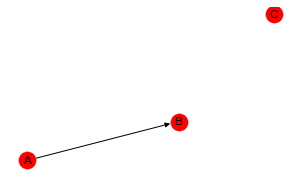

In [13]:
a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5, 0.4, 0.6])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.5, 0.5])

bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c) \
    .add_edge(Edge(a, b, EdgeType.DIRECTED))

g = convert_for_drawing(bbn)

fig, ax = plt.subplots(figsize=(5, 3))

nx.draw(**{
    'G': g,
    'ax': ax,
    'pos': nx.spiral_layout(g),
    'with_labels': True,
    'labels': {0: 'A', 1: 'B', 2: 'C'},
    'node_color': 'r'
})

Observe how deviance is always best with the homogenous model. However, the log-likelihood of `(C,AB)` is very competitive with better performing models.

In [14]:
sampler = LogicSampler(bbn)
df = pd.DataFrame(sampler.get_samples(n_samples=1_000, seed=37)) \
    .rename(columns={0: 'a', 1: 'b', 2: 'c'}) \
    .assign(n=1) \
    .groupby(['a', 'b', 'c']) \
    .agg('sum') \
    .reset_index()

result_df = []

for _ in range(10):
    df = pd.DataFrame(sampler.get_samples(n_samples=1_000, seed=37)) \
        .rename(columns={0: 'a', 1: 'b', 2: 'c'}) \
        .assign(n=1) \
        .groupby(['a', 'b', 'c']) \
        .agg('sum') \
        .reset_index()
    
    r = pd.DataFrame([{**{'model': m}, **get_stats(f, df)} for m, f in formulas.items()])
    result_df.append(r)
    
result_df = pd.concat(result_df)

result_df \
    .groupby(['model']) \
    .agg('mean') \
    .sort_values(['log_likelihood', 'deviance'], ascending=[False, False])

,df_model,deviance,log_likelihood
model,,,
"(AB, AC, BC)",6,0.322293,-26.764887
"(BA,AC)",5,0.405884,-26.806682
"(AB,BC)",5,0.815281,-27.011381
"(C,AB)",4,0.857531,-27.032506
"(AC,CB)",5,15.078151,-34.142816
"(B,AC)",4,15.120402,-34.163942
"(A,BC)",4,15.529799,-34.368640
"(A,B,C)",3,15.572049,-34.389765


## Complete independence

In this last example, we create a BBN with `A`, `B` and `C` and no edges between them.

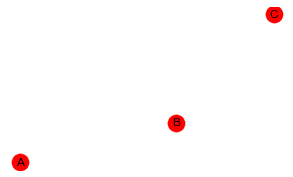

In [15]:
a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.5, 0.5])

bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c)

g = convert_for_drawing(bbn)

fig, ax = plt.subplots(figsize=(5, 3))

nx.draw(**{
    'G': g,
    'ax': ax,
    'pos': nx.spiral_layout(g),
    'with_labels': True,
    'labels': {0: 'A', 1: 'B', 2: 'C'},
    'node_color': 'r'
})

All the models now seem to be competitive with one another based on the log-likelihood.

In [16]:
sampler = LogicSampler(bbn)
df = pd.DataFrame(sampler.get_samples(n_samples=1_000, seed=37)) \
    .rename(columns={0: 'a', 1: 'b', 2: 'c'}) \
    .assign(n=1) \
    .groupby(['a', 'b', 'c']) \
    .agg('sum') \
    .reset_index()

result_df = []

for _ in range(10):
    df = pd.DataFrame(sampler.get_samples(n_samples=1_000, seed=37)) \
        .rename(columns={0: 'a', 1: 'b', 2: 'c'}) \
        .assign(n=1) \
        .groupby(['a', 'b', 'c']) \
        .agg('sum') \
        .reset_index()
    
    r = pd.DataFrame([{**{'model': m}, **get_stats(f, df)} for m, f in formulas.items()])
    result_df.append(r)
    
result_df = pd.concat(result_df)

result_df \
    .groupby(['model']) \
    .agg('mean') \
    .sort_values(['log_likelihood', 'deviance'], ascending=[False, False])

,df_model,deviance,log_likelihood
model,,,
"(AB, AC, BC)",6,0.520471,-26.921138
"(AC,CB)",5,0.593338,-26.957571
"(BA,AC)",5,0.719971,-27.020888
"(B,AC)",4,0.787820,-27.054812
"(AB,BC)",5,0.977137,-27.149470
"(A,BC)",4,1.044986,-27.183395
"(C,AB)",4,1.171619,-27.246712
"(A,B,C)",3,1.239468,-27.280636
